# Online Payment Fraud Detection using Machine Learning

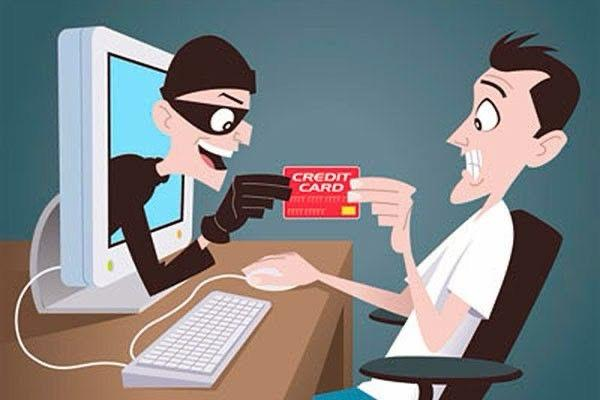

## Introduction

Have you ever worried about someone using your credit card without permission? That’s called **online payment fraud**, and it’s a big problem today as more people shop and pay online.

In this project, we’re going to use **machine learning** to help catch those fake or suspicious transactions — just like teaching a smart system to be a detective!

### Steps We Will Follow:

- Understand the Data
- Clean and Prepare the Data
- Explore the Data Visually (EDA)
- Build Machine Learning Models
- Evaluate the Models
- Improve the Best Model
- Save the Model

## Importing Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imblearn3-wkl/imbalanced_learn-0.10.1-py3-none-any.whl
/kaggle/input/fraud-detection-dataset/AIML Dataset.csv


In [2]:
import sklearn


print("scikit-learn version:", sklearn.__version__)



scikit-learn version: 1.2.2


In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imblearn3-wkl/imbalanced_learn-0.10.1-py3-none-any.whl
/kaggle/input/fraud-detection-dataset/AIML Dataset.csv


## Loading Dataset

In [4]:
df = pd.read_csv('/kaggle/input/fraud-detection-dataset/AIML Dataset.csv')
                 # replace this with dataset path on your device(upload it on the google drive frist)

## Understand the data

In [5]:
#Show the first 5 rows (to understand structure and columns)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#Show the last 5 rows (to understand structure and columns)
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
# number of rows(samples) and columns(features)
df.shape

(6362620, 11)

In [8]:
#datatypes and missing (null) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
#Summary statistics (mean, std,..)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
#Count of missing values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [13]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
#Finding the precentage of fraud
round(df['isFraud'].value_counts()[1]/df.shape[0]*100,2)

0.13

Text(0.5, 1.0, 'Pie chart of isFraud labels')

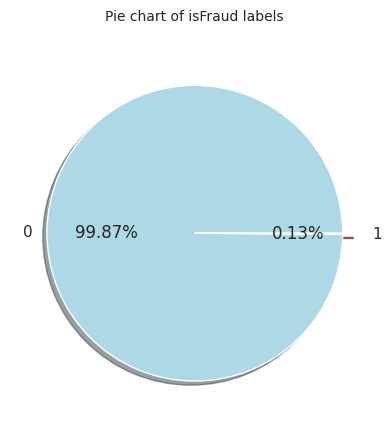

In [15]:
plt.pie(
    df['isFraud'].value_counts(),
    autopct="%.2f%%",
    labels=(df['isFraud'].value_counts()).index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of isFraud labels", pad=20, fontsize=10, fontweight=20)

In [16]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

## Exploratory Data Analysis(EDA) with visualizations

### Transaction types

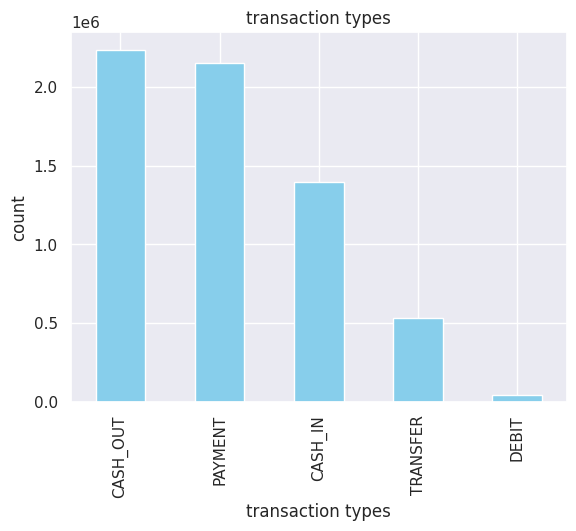

In [17]:
df['type'].value_counts().plot(kind='bar',title='transaction types',color='skyblue')
plt.xlabel('transaction types')
plt.ylabel('count')
plt.show()

### Fraud Rate by Type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


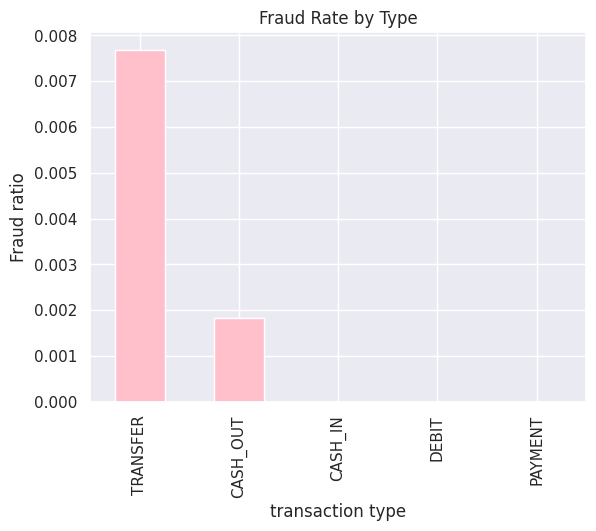

In [18]:
fraud_by_type=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraud_by_type)
fraud_by_type.plot(kind="bar",title='Fraud Rate by Type',color='pink')
plt.xlabel('transaction type')
plt.ylabel('Fraud ratio')
plt.show()

In [19]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

## Distribution of the target class (fraud vs. non-fraud)

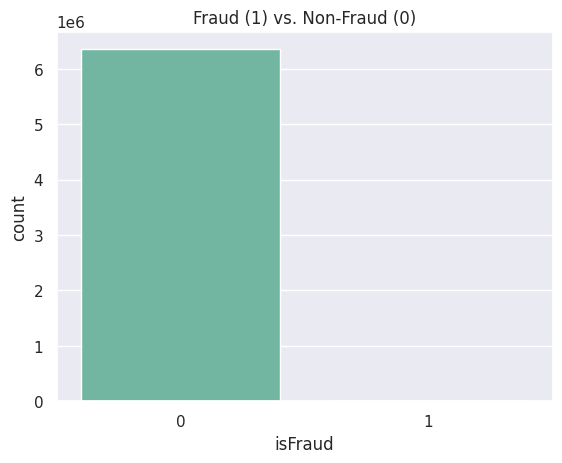

In [20]:
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title('Fraud (1) vs. Non-Fraud (0)')
plt.show()

### Transaction Amount Distribution

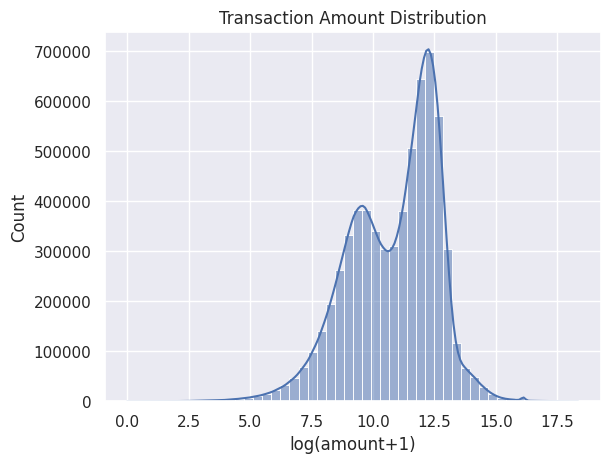

In [21]:
sns.histplot(np.log1p(df['amount']), bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('log(amount+1)')
plt.show()

### Transaction Amount vs Class(filtterd under 50k

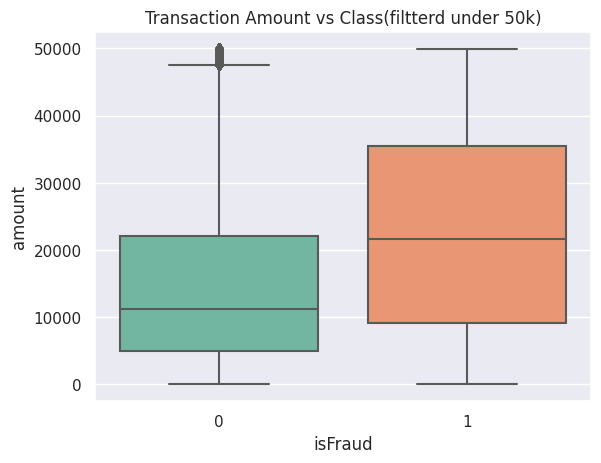

In [22]:
# Filtering out transactions with an amount greater than 50,000 to reduce the impact of outliers
sns.boxplot(x='isFraud', y='amount', data=df[df['amount']<50000], palette='Set2')
plt.title('Transaction Amount vs Class(filtterd under 50k)')
plt.show()

### Number of Fraudulent Transactions per Step

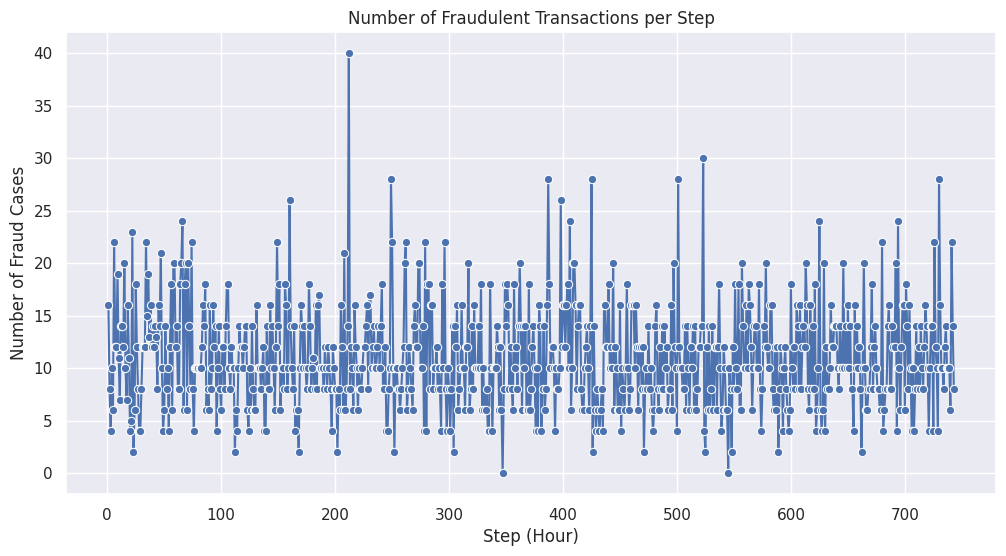

In [23]:
fraud_per_step = df.groupby('step')['isFraud'].sum()

# Plotting fraud count per step
plt.figure(figsize=(12,6))
sns.lineplot(x=fraud_per_step.index, y=fraud_per_step.values, marker='o')
plt.title('Number of Fraudulent Transactions per Step')
plt.xlabel('Step (Hour)')
plt.ylabel('Number of Fraud Cases')
plt.grid(True)
plt.show()

### Create a new feature: the difference in balance for the origin account

In [24]:
# This shows how much money was taken from the sender during the transaction
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

### Create a new feature: the difference in balance for the destination account

In [25]:
# This shows how much money was added to the receiver's account during the transaction
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

#### Check negative values

In [26]:
df['balanceDiffOrig']<0

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [27]:
(df['balanceDiffOrig']<0).sum()

1399253

In [28]:
(df['balanceDiffDest']<0).sum()

1238864

In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### Filter relevent Data & Drop Irrelevent Data

In [30]:
df.drop('step', axis=1, inplace=True)

In [31]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


#### View top 10 senders based on the number of transactions sent

In [32]:
top_senders=df['nameOrig'].value_counts()
top_senders.head(10)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

#### View top 10 recievers based on the number of transactions recieved

In [33]:
top_receivers = df['nameDest'].value_counts()
top_receivers.head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

#### top 10 senders by amount they send

In [34]:
top_senders_by_amount = df.groupby('nameOrig')['amount'].sum().sort_values(ascending=False).head(10)
print(top_senders_by_amount)

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.27
C811810230     67500761.29
C420748282     66761272.21
C1139847449    64234448.19
C300140823     63847992.58
C372535854     63294839.63
Name: amount, dtype: float64


In [35]:
# Filter the dataset for fraud transactions (where isFraud = 1)
fraud_users = df[df['isFraud'] == 1]

# If you want to get the top 10 fraudulent senders (based on number of fraud transactions)
top_fraud_senders = fraud_users['nameOrig'].value_counts().head(10)

# If you want to get the top 10 fraudulent receivers (based on number of fraud transactions)
top_fraud_receivers = fraud_users['nameDest'].value_counts().head(10)

print("Top 10 Fraudulent Senders:")
print(top_fraud_senders)

print("\nTop 10 Fraudulent Receivers:")
print(top_fraud_receivers)

Top 10 Fraudulent Senders:
nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

Top 10 Fraudulent Receivers:
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64


In [36]:
fraud_types=df[df['type'].isin(['CASH_OUT','TRANSFER'])]
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

### Fraud Count by Transaction Type

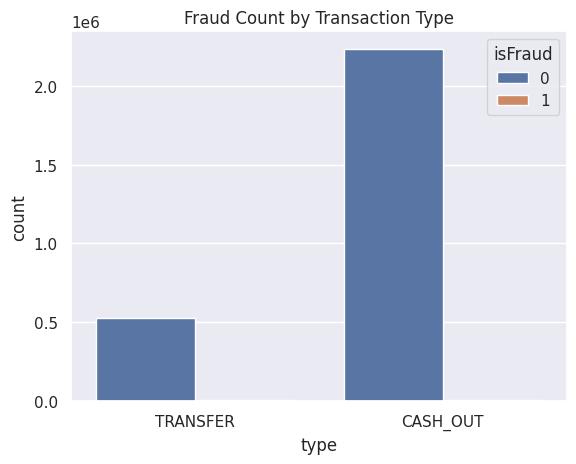

In [37]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Count by Transaction Type')
plt.show()

### Correlation Heatmap for Numeric Features

In [38]:
corr=df[['amount','oldbalanceOrg', 'newbalanceOrig' ,'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


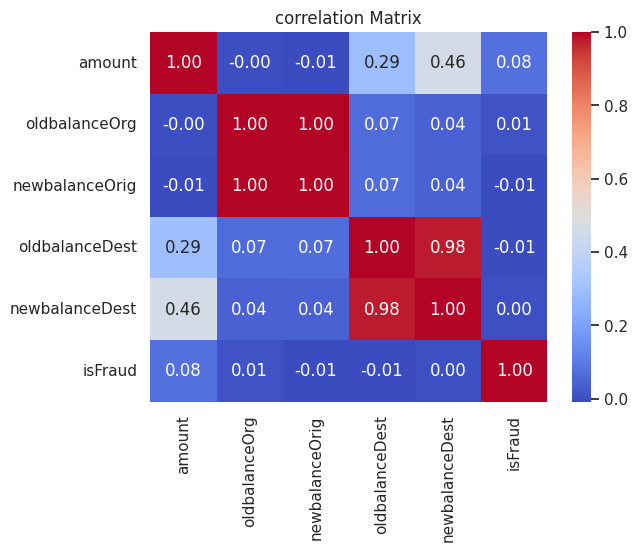

In [39]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt='.2f')
plt.title("correlation Matrix")
plt.show()

In [40]:
# Filter the transactions where the original balance before the transaction is greater than 0,
# and the new balance after the transaction is 0, specifically for the types 'CASH_OUT' or 'TRANSFER'.
# This helps identify transactions where the entire balance was either withdrawn or transferred out, 
# potentially indicating unusual behavior like emptying an account.
zero_after_transfer=df[
(df['oldbalanceOrg']>0)&
(df['newbalanceOrig']==0)&
(df['type'].isin(['CASH_OUT','TRANSFER']))
]

In [41]:
len(zero_after_transfer)

1188074

In [42]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [43]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [44]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


## feature engineering

In [45]:
df_model = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [46]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


#### Define the feature categories:

In [47]:
# - 'categorical' contains columns with categorical (non-numeric) values, such as transaction type
# - 'numeric' contains columns with continuous numerical values related to transaction amounts and balances
categorical=['type']
numeric=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        # Apply scaling to numeric features
        ('num', StandardScaler(), numeric),
        # Apply one-hot encoding to the categorical feature 'type'
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'    # Drop any columns not listed in numeric or categorical
)

### Split the dataframe into target variable and independent variables


In [49]:
# Apply transformations to the data
X_processed = preprocessor.fit_transform(df_model.drop('isFraud', axis=1))
y = df_model['isFraud']  # The target variable

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

## Handle Class Imbalance

In [58]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [59]:
# Check the class distribution after balancing
print("Balanced class distribution:\n", pd.Series(y_balanced).value_counts())

Balanced class distribution:
 isFraud
0    4448056
1    4448056
Name: count, dtype: int64


### Model Building

- ### Logistic Regression

In [53]:
# Build and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_balanced, y_balanced)


LogisticRegression(max_iter=1000)

- ### XGBoost

In [55]:
# Build and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_balanced, y_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Model Evaluation

In [60]:
# List of models for evaluation
models = {
    'Logistic Regression': lr_model,
    'XGBoost': xgb_model
}

In [61]:
# Evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC AUC Score
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")



=== Logistic Regression ===
Confusion Matrix:
[[1807404   98947]
 [    119    2316]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906351
           1       0.02      0.95      0.04      2435

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

ROC AUC Score: 0.9881

=== XGBoost ===
Confusion Matrix:
[[1901970    4381]
 [     15    2420]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.36      0.99      0.52      2435

    accuracy                           1.00   1908786
   macro avg       0.68      1.00      0.76   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 0.9981


# Model Evaluation and Comparison

In [64]:
# Step 1: Predictions dictionary
predictions = {
    "Logistic Regression": lr_model.predict(X_test),
    "XGBoost": xgb_model.predict(X_test)
}

# Optional: Probabilities for ROC AUC
probas = {
    "Logistic Regression": lr_model.predict_proba(X_test)[:, 1],
    "XGBoost": xgb_model.predict_proba(X_test)[:, 1]
}

# Step 2: Automatically evaluate all models
evaluation_results = []

for model_name, y_pred in predictions.items():
    y_prob = probas[model_name]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    evaluation_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": auc
    })

# Step 3: Create a clean DataFrame
eval_df = pd.DataFrame(evaluation_results).sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Step 4: Styled Table
display(
    eval_df.style.background_gradient(subset=["ROC AUC"], cmap="Greens") \
                   .background_gradient(subset=["F1-Score"], cmap="Blues") \
                   .format({"Accuracy": "{:.3f}", "Precision": "{:.3f}", "Recall": "{:.3f}", 
                            "F1-Score": "{:.3f}", "ROC AUC": "{:.3f}"})
)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,XGBoost,0.998,0.356,0.994,0.524,0.998
1,Logistic Regression,0.948,0.023,0.951,0.045,0.988


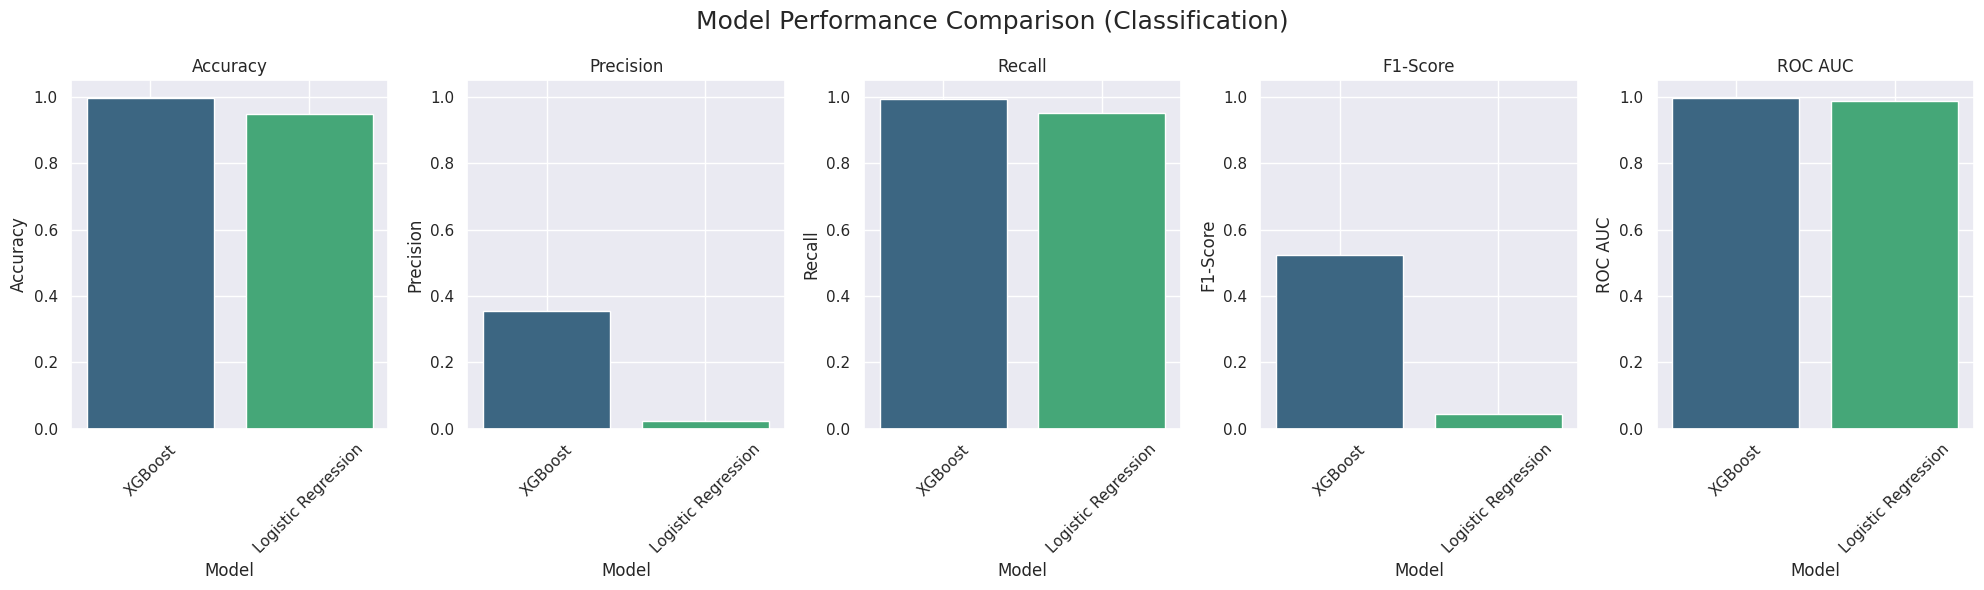

In [66]:
# Metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

plt.figure(figsize=(20, 6))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 5, i)
    sns.barplot(data=eval_df, x='Model', y=metric, palette='viridis')
    plt.title(f'{metric}')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.suptitle('Model Performance Comparison (Classification)', fontsize=18)
plt.tight_layout()
plt.show()


In [67]:
import joblib
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']